In [2]:
import pandas as pd
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

data, meta = arff.loadarff(r'C:\Users\gzmce\OneDrive - Firat University\Masaüstü\artificalGerekli\complex9.arff')
df = pd.DataFrame(data)

In [3]:
pd.DataFrame(data)["class"].value_counts()

class
b'6'    906
b'8'    742
b'5'    343
b'7'    328
b'3'    204
b'4'    198
b'1'    113
b'2'    110
b'0'     87
Name: count, dtype: int64

In [4]:
print(df.columns)

Index(['x', 'y', 'class'], dtype='object')


In [5]:
from sklearn.preprocessing import StandardScaler

# Sayısal verileri al
X = np.column_stack((data['x'], data['y']))

# Standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
data_pd = pd.DataFrame(data)
data_pd["class"] = data_pd["class"].apply(lambda c : c.decode("utf-8"))
data_pd["class"] = data_pd["class"].apply(lambda c : int(c) if c != 'noise' else -1)
data_pd #classları sayısal yaptık.

,x,y,class
0,660.976,304.225,0
1,636.213,306.174,0
2,662.753,307.565,0
3,657.487,307.740,0
4,635.273,308.157,0
...,...,...,...
3026,554.716,460.908,8
3027,577.082,461.731,8
3028,569.221,462.349,8
3029,556.636,464.758,8


In [7]:
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, [0, 1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=9, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [8]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(data_pd["class"],y_kmeans) 

0.6326842363446564

In [9]:
import time

start = time.time()

kmeans = KMeans(n_clusters=9, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

end = time.time()
print(f"K-Means çalışma süresi: {end - start:.4f} saniye")

K-Means çalışma süresi: 0.0161 saniye


In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Byte string'leri UTF-8'e çevir
for col in df.select_dtypes([object]).columns:
    try:
        df[col] = df[col].str.decode('utf-8')
    except AttributeError:
        pass  # Zaten string olanlar için

# İlk iki sütunu al
X = df.iloc[:, [0, 1]].values

# Veriyi ölçekle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=9)
labels_agg = agg.fit_predict(X_scaled)


In [11]:
normalized_mutual_info_score(data_pd["class"],labels_agg) 

0.616675142405718

In [12]:
import time

start = time.time()

agg = AgglomerativeClustering(n_clusters=9)
labels_agg = agg.fit_predict(X_scaled)

end = time.time()
print(f"çalışma süresi: {end - start:.4f} saniye")

çalışma süresi: 0.2853 saniye


In [40]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Kategorik sütunları decode et (gerekliyse)
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

# X ve Y özelliklerini al
X = df.iloc[:, [0, 1]].values

# Standardizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN modelini oluştur
dbscan = DBSCAN(eps=0.1)
labels = dbscan.fit_predict(X_scaled)

In [41]:
normalized_mutual_info_score(data_pd["class"],labels) 

0.890613485880211

In [42]:
import time

start = time.time()


dbscan = DBSCAN(eps=0.2)
labels = dbscan.fit_predict(X_scaled)

end = time.time()
print(f"çalışma süresi: {end - start:.4f} saniye")

çalışma süresi: 0.0358 saniye


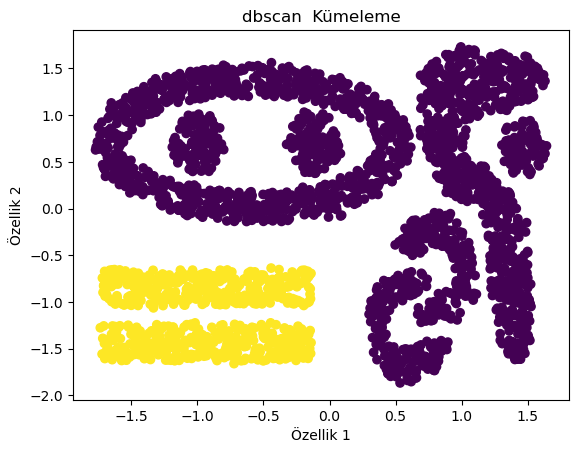

In [43]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('dbscan  Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

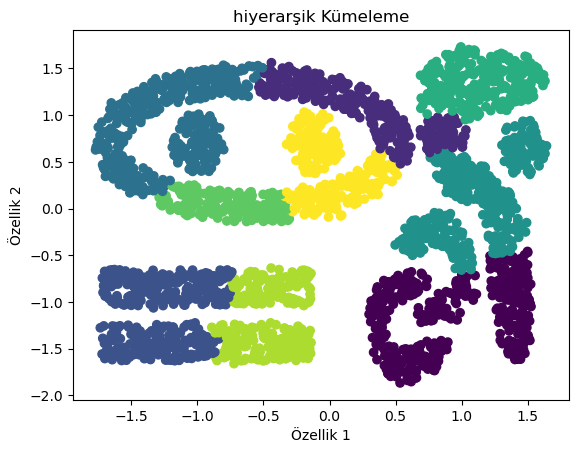

In [44]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='viridis')
plt.title('hiyerarşik Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

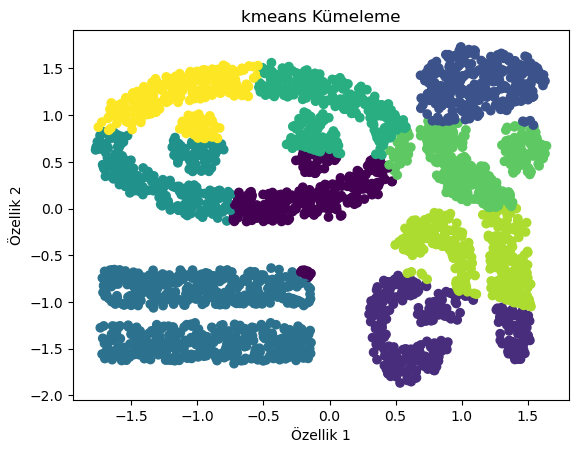

In [45]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.title('kmeans Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

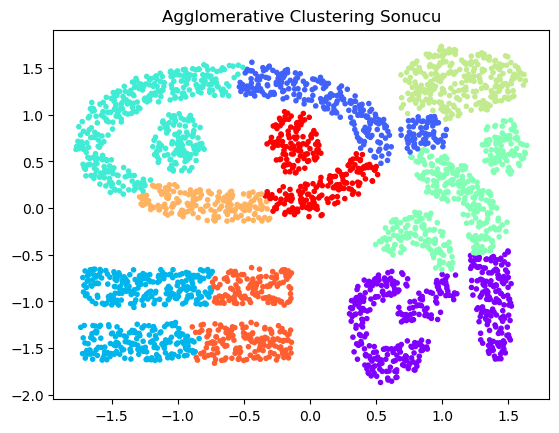

In [46]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='rainbow', s=9)
plt.title('Agglomerative Clustering Sonucu')
plt.show()


In [47]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(y_true, labels_agg)
nmi = normalized_mutual_info_score(y_true, labels_agg)

print(f"ARI: {ari:.3f}")
print(f"NMI: {nmi:.3f}")


NameError: name 'y_true' is not defined